## Name: Sanchit Kripalani <br> Batch: M1 <br> Roll No: 31145

### Problem Statement

Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains information about various houses in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset.

The objective is to predict the value of prices of the house using the given features.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

# For plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data 
from sklearn.datasets import load_boston

loaded_data = load_boston()

# Convert the result into dataframe
raw_data = pd.DataFrame(loaded_data.data, columns=loaded_data.feature_names)

In [3]:
# .head() can be used to print the first 5 entries in the dataset
raw_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### About the Data

In [4]:
print("The shape of the data is: ", raw_data.shape)
print("Thus, the number of columns/attributes are: ", raw_data.shape[1])

The shape of the data is:  (506, 13)
Thus, the number of columns/attributes are:  13


There are 13 attributes for each house that are considered.

CRIM - per capita crime rate by town<br>
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.<br>
INDUS - proportion of non-retail business acres per town.<br>
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)<br>
NOX - nitric oxides concentration (parts per 10 million)<br>
RM - average number of rooms per dwelling<br>
AGE - proportion of owner-occupied units built prior to 1940<br>
DIS - weighted distances to five Boston employment centres<br>
RAD - index of accessibility to radial highways<br>
TAX - full-value property-tax rate per 10,000 Dollars<br>
PTRATIO - pupil-teacher ratio by town<br>
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town<br>
LSTAT - % lower status of the population<br>

**Note:**
MEDV - Median value of owner-occupied homes in $1000's<br>
This is the target value (Price of the house) 

### Data Preprocessing

In [5]:
# First, let us get the target values loaded into a Series
target_array = loaded_data.target

# Convert numpy array into pandas series
target_data = pd.Series(target_array, name='target')

target_data.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64

In [6]:
# Using .describe() to get Statistical Summary
raw_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


**Note: MEDV attribute, which was mentioned earlier, is represented by target_data** 

In [7]:
# Check if there are any null values in the dataset
print("Number of Null values in each attribute is:")
print(raw_data.isna().sum())
print("\nNumber of Null values in target is: ", target_data.isna().sum())

Number of Null values in each attribute is:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

Number of Null values in target is:  0


In [8]:
# Create a copy of raw data which will also store the target values
complete_data = raw_data.copy()

complete_data['target'] = target_data

complete_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Visualization

First, we will try to guess how a change in each individual attribute will affect the target value (i.e, the price of the house).

We will use +ve to indicate that a rise in the value of the attribute will contribute to a rise in price of the house. Similarly, we will assign -ve for all the attributes which have a negative impact on the house price.

**Crim** - (-ve) An increase in crime rate will obviously make the house as well as the neighbourhood less attractive<br> 
**Zn** - (+ve) Zoning will increase the cost of land, because land is reserved.<br>
**Indus** - (-ve) More the industrial area, worse are the living conditions. <br>
**Chas** - (+ve) Riverside properties in general have a higher cost.<br>
**Nox** - (-ve) Presence of Nox gases indicate the house is poorly ventilated.<br>
**Rm** - (+ve) More the no. of rooms in a house, larger it's price <br>
**Age** - (-ve) Older the houses, more the structural problems with them.<br>
**Dis** - (+ve) Closer the house is to employment areas, higher it's price, because residents will save both time and money on commute.<br>
**Rad** - (+ve) Larger the index, better accessibility to highways, more the cost of house. <br> 
**Tax** - Taxes are actually dependant on the property values, so not sure how these will affect house prices.<br>
**PTratio** - (-ve) May indicate the quality of education in town <br>
**B** - (-ve) Since there was a lot of discrimination against blacks in 1970s, we can expect that the prices of houses to decrease if the proportion of blacks in town decrease. <br>
**Lstat** - (-ve) Higher the lower status population, lower will be the price of the houses. Due to overall less paying capacity of the population.

**Backing intuition with statistics: Pearson Correlation Coefficient**

Pearson correlation coefficient or Pearson’s correlation coefficient is defined in statistics as the measurement of the strength of the relationship between two variables and their association with each other.

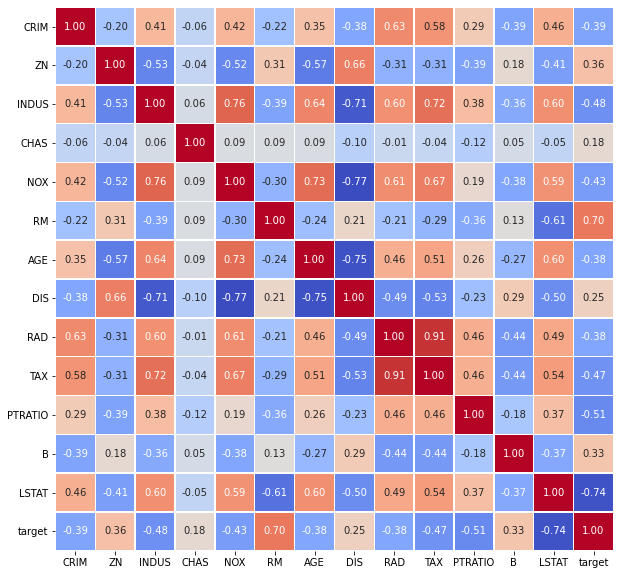

In [9]:
# Finding pearson coefficient for all attributes
corr = complete_data.corr()

# Plot the data in the form of a heatmap
plt.figure(figsize=(10, 10))

sns.heatmap(corr, annot=True, fmt='.2f', cbar=False, cmap="coolwarm", linewidth=0.5)

plt.show()

**Understanding the Heatmap**

The heatmap shows how each attribute is related to other attributes of housing, as well as the final housing price.

It must be noted that higher the magnitude of the coefficient, larger positive or negative impact the attribute will have. Darker the shade of color in heatmap, more it's magnitude. 

**Unexpected Observations**

Almost all of the guesses we made on each attribute of housing came out to be correct. However, 

It is observed that:

- Contrary to what we believed, RAD (Accessibilty to highways) has a negative impact on price of the house. (Unable to justify why this is the case).

- Also, the proportion of blacks in the town seems to have a positive impact on price of the houses, a result we did not expect. This is something almost all the studies do not agree to. Studies have shown that housing discrimination still exists and there is a disparity in housing appraisals on the basis on race.

- Tax seems to have a negative impact on house prices. More the Tax lesser is the house price.

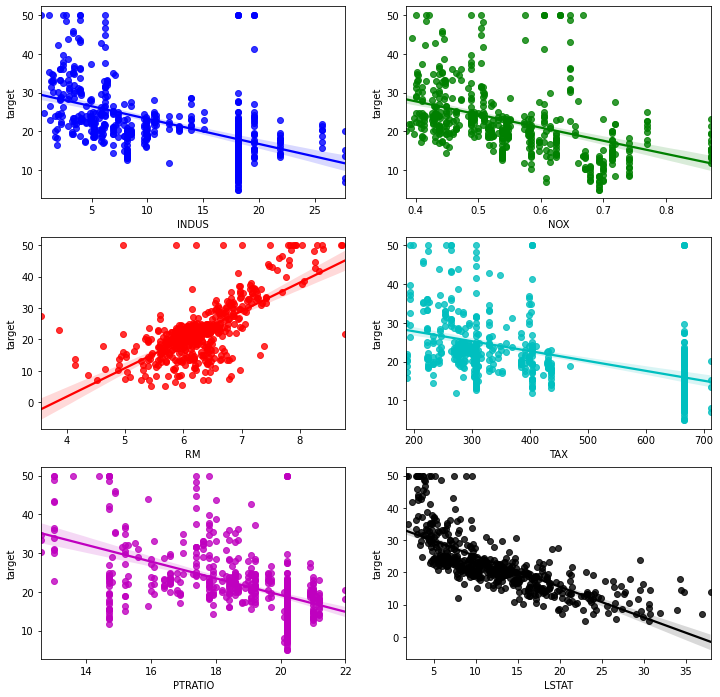

In [10]:
# Now, let us plot all the attributes with a high coefficient
plot_list = ['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']
color_list = ['b', 'g', 'r', 'c', 'm', 'k']

x_plot = complete_data.loc[:, plot_list]
y_plot = complete_data['target']

fig, axes = plt.subplots(3, 2, figsize=(12,12))
axes_flatten = axes.flatten()

index = 0
for i in plot_list:
    sns.regplot(y=y_plot, x=x_plot[i], ax=axes_flatten[index], color=color_list[index])
    index += 1

**Observations** 

The above graphs thus show a linear relationship between the attribute and price of the house (target)

### Creating the Model 

In [11]:
# Split the data into train and test
from sklearn.model_selection import train_test_split

# Separate the dependant and independant variables
X = complete_data.drop('target', axis=1) 
y = complete_data['target']

# Store a copy of X for later use
X_copy = X.copy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the data to improve model accuracy
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


# Get the X_test data which is not scaled
_, unscaled_X_test, _, _ = train_test_split(X_copy, y, test_size=0.3, random_state=42)

In [12]:
print("Shape of X_train is: ", X_train.shape)
print("Shape of X_test is: ", X_test.shape)
print("Shape of y_train is: ", y_train.shape)
print("Shape of y_test is: ", y_test.shape)

Shape of X_train is:  (354, 13)
Shape of X_test is:  (152, 13)
Shape of y_train is:  (354,)
Shape of y_test is:  (152,)


In [13]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [14]:
# Train the data 
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Get the Prediction
y_preds = model.predict(X_test)

### Performance testing

In [16]:
# Print out the different performance metrics for the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_preds)
mae = mean_absolute_error(y_test, y_preds)
r2_score = r2_score(y_test, y_preds)

print('For testing data:')
print('Mean Squared Error is: ', mse)
print('Mean absolute Error is: ', mae)
print('R2 score is: ', r2_score)

For testing data:
Mean Squared Error is:  21.51744423117721
Mean absolute Error is:  3.1627098714574053
R2 score is:  0.7112260057484932


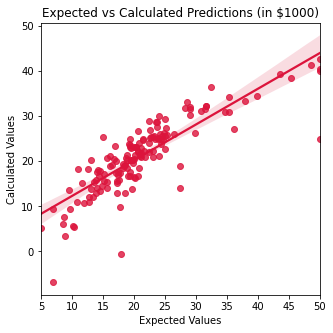

In [17]:
# Plotting predicted and target results
plt.figure(figsize=(5,5))

# Scatter Plot
sns.regplot(x=y_test, y=y_preds, color='crimson')

plt.title("Expected vs Calculated Predictions (in $1000)")
plt.xlabel("Expected Values")
plt.ylabel("Calculated Values")
plt.show()

In [18]:
# Print the coefficients of the regression model
np.set_printoptions(suppress=True)

coeff_dataframe = pd.DataFrame({'Attribute': X.columns, 'Regression Coefficient': model.coef_})

coeff_dataframe

,Attribute,Regression Coefficient
0,CRIM,-1.108346
1,ZN,0.808440
2,INDUS,0.343135
3,CHAS,0.813864
4,NOX,-1.798043
5,RM,2.913858
6,AGE,-0.298939
7,DIS,-2.942511
8,RAD,2.094193
9,TAX,-1.447067


In [19]:
# Add the Final Predictions in dataframe
final_data = unscaled_X_test.copy()
final_data['Target'] = y_test
final_data['Prediction'] = y_preds

final_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target,Prediction
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04,23.6,28.648960
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53,32.4,36.495014
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6,15.411193
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52,22.8,25.403213
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27,16.1,18.855280
